In [1]:
import csv
import numpy as np
import cv2
import matplotlib.pyplot as plt

def get_train_data():
    lines=[]
    with open('./Data/driving_log.csv') as csvfile:
        reader=csv.reader(csvfile)
        for line in reader:
            lines.append(line)

    lines=lines[1:]

    images=[]
    measurement=[]
    steer=[]

    for i in range(len(lines)):
        source_path=lines[i][0]
        filename= source_path.split('\\')[-1]
        current_path='./Data/IMG/' + filename
        image=cv2.imread(current_path)
        images.append(image)
        measurement=float(lines[i][3]) #Storing all the steer measurements related to center images
        steer.append(measurement)

    corr=0.23
    left_steer=[x+corr for x in steer]
    right_steer=[x-corr for x in steer]

    steer=steer+left_steer
    steer=steer+right_steer
    
    # Add left_images to data
    for i in range(len(lines)):
        source_path = lines[i][1]
        filename = source_path.split('\\')[-1]
        current_path = './Data/IMG/' + filename
        image = cv2.imread(current_path)
        images.append(image)

    for i in range(len(lines)):
        source_path = lines[i][2]
        filename = source_path.split('\\')[-1]
        current_path = './Data/IMG/' + filename
        image = cv2.imread(current_path)
        images.append(image)

    X_train=np.array(images)
    y_train= np.array(steer)
    
    return (X_train, y_train)

In [2]:
X_train, y_train= get_train_data()
print("Number of Training Samples: {}" .format(len(X_train)))
print("Number of Training Labels: {}" .format(len(y_train)))

Number of Training Samples: 35577
Number of Training Labels: 35577


Using TensorFlow backend.


Train on 28461 samples, validate on 7116 samples
Epoch 1/10
28461/28461 [==============================] - 430s - loss: 0.0185 - val_loss: 0.0249
Epoch 2/10
28461/28461 [==============================] - 430s - loss: 0.0150 - val_loss: 0.0251
Epoch 3/10
28461/28461 [==============================] - 430s - loss: 0.0140 - val_loss: 0.0206
Epoch 4/10
28461/28461 [==============================] - 428s - loss: 0.0132 - val_loss: 0.0211
Epoch 5/10
28461/28461 [==============================] - 428s - loss: 0.0127 - val_loss: 0.0233
Epoch 6/10
28461/28461 [==============================] - 430s - loss: 0.0119 - val_loss: 0.0244
Epoch 7/10
28461/28461 [==============================] - 428s - loss: 0.0114 - val_loss: 0.0205
Epoch 8/10
28461/28461 [==============================] - 429s - loss: 0.0107 - val_loss: 0.0180
Epoch 9/10
28461/28461 [==============================] - 428s - loss: 0.0101 - val_loss: 0.0182
Epoch 10/10
28461/28461 [==============================] - 435s - loss: 0.0093

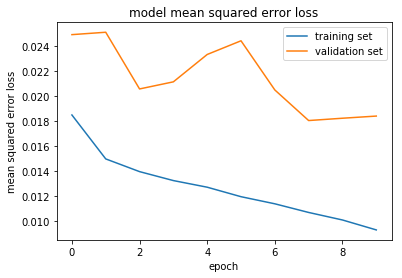

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Convolution2D, MaxPooling2D, Lambda, ELU, Dropout, Cropping2D
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Nvidia - Neural Network -modified version (Added Dense (1200))
model = Sequential()
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((50,20), (0,0))))
model.add(Convolution2D(24,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(36,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(48,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(Flatten())
model.add(Dense(1200))
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
history_object=model.fit(X_train ,y_train , validation_split=0.2, shuffle=True, nb_epoch=10)
model.save('model.h5')

plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()